In [0]:
import numpy as np
import matplotlib.pyplot as pdalt
import pandas as pd

In [0]:
dataset=pd.read_csv('/content/Complete-Deep-Learning/ANN/Churn_Modelling.csv')

In [0]:

X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [0]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [0]:
X=pd.concat([X,geography,gender],axis=1)

In [0]:
X=X.drop(['Geography','Gender'],axis=1)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [0]:

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


In [111]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="he_uniform")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="he_uniform")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`
  if __name__ == '__main__':


In [112]:
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 1s 265us/step - loss: 0.5973 - acc: 0.7358 - val_loss: 0.4914 - val_acc: 0.7963
Epoch 2/100
5359/5359 [==============================] - 1s 121us/step - loss: 0.4699 - acc: 0.7962 - val_loss: 0.4592 - val_acc: 0.7978
Epoch 3/100
5359/5359 [==============================] - 1s 123us/step - loss: 0.4505 - acc: 0.7996 - val_loss: 0.4473 - val_acc: 0.8023
Epoch 4/100
5359/5359 [==============================] - 1s 120us/step - loss: 0.4412 - acc: 0.8026 - val_loss: 0.4403 - val_acc: 0.8023
Epoch 5/100
5359/5359 [==============================] - 1s 121us/step - loss: 0.4342 - acc: 0.8076 - val_loss: 0.4356 - val_acc: 0.8073
Epoch 6/100
5359/5359 [==============================] - 1s 121us/step - loss: 0.4283 - acc: 0.8141 - val_loss: 0.4312 - val_acc: 0.8111
Epoch 7/100
5359/5359 [==============================] - 1s 122us/step - loss: 0.4230 - acc: 0.8166 - val_loss: 0.4268 - val_acc: 

In [113]:
X_train.shape

(8000, 11)

In [114]:
y_train.shape

(8000,)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


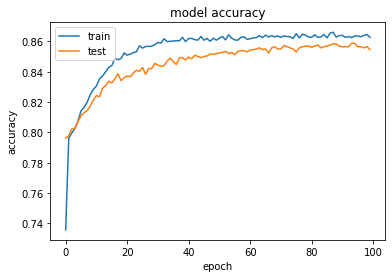

In [115]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [0]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)





In [117]:
print(cm)
print(score)

[[1529   66]
 [ 209  196]]
0.8625
